### Domain Background

In a service industry time plays a big factor. The amount of time worked on a Client project translates into cost and revenue. Projects are created in the system to track time,cost and budget. Typically when a new project is created budget is allocated to it. The budget is what a Client will pay to do the work. Users get assigned to the project so he/she can log time worked on different tasks. This time gets converted to cost and compared with the budget

### Problem Statement

The assumption/ hypothesis is that if the cost is less than or equal to the budget then the project is efficiently managed else it is not efficiently managed.Understanding what factors influence a project to go over budget and the likeliness of a project to go over budget will help an organization make better business decisions.

In [1]:
import pandas as pd
combine = pd.read_csv ('combinedfile.csv',index_col = 0 )
data17 =  pd.read_csv ('data17_modified.csv')
data16 = pd.read_csv ('data16_modified.csv')




### Exploratory analysis

In this paper I will analyse projects and the associated meta data to the projects to find any trend/ patterns that will explain when a project has the potential to go over budget.  The features include the following. The Target variable is binary i.e Project went over budget yes/ no.


- Count of different departments/disciplines involved in the project
- Total hours worked by senior level management in the project
- Total hours worked by mid level management in the project 
- Total hours worked by Junior level employees in the project
- Count of different offices involved in the project
- Total Number of Holidays taken by team members during the Project
- Total duration of the project
- Number of additional projects thatthe team is assigned to during the project duration
- Count of different service offering tagged to a project
- Project went overbudget yes/ no - 1=yes, 0=no



In [2]:
from IPython.display import display

test1 = data17
combine = test1.drop(['Unnamed: 0','srhrs','midhrs','jrhrs'], axis = 1)


#combine = data17[(data17.srhrs+data17.midhrs+data17.jrhrs >= 40) & (data17.teamsize >=3 )]

#combine = combine.drop(['totalhrs'],axis=1)

display(combine.head(n=20))


,JobCode,deptcount,Psrhrs,Pmidhrs,PjrHrs,officecount,ptodays,pjduration,additionalassignments,teamsize,projtags,overbudget
0,C6355,4,0.038095,0.691667,0.270238,1,149,252,517,13,9,1
1,C6441,5,0.623150,0.361065,0.015784,2,152,210,172,15,0,1
2,10803922,3,0.059606,0.888310,0.052083,3,200,335,512,10,4,0
3,10805002,4,0.181053,0.288421,0.530526,1,100,421,278,8,5,1
4,10803810,9,0.618996,0.181223,0.199782,2,440,272,541,21,0,1
5,M5285,4,0.788825,0.079704,0.131471,2,174,181,342,18,5,0
6,C6568,4,0.054878,0.070122,0.875000,1,89,161,315,11,9,0
7,10804680,5,0.368421,0.533835,0.097744,1,191,282,206,15,9,1
8,C6652,6,0.037102,0.577739,0.385159,1,281,246,415,19,8,1
9,10804660,6,0.205302,0.658446,0.136252,2,239,218,267,18,12,1


## Step 1  - to get an overview and examine target variable
1. The total number of records - 1709
2. Total number of features -14
3. Number of projects over budget -889
4. % of project over budget -52%


In [3]:
# total number of records

n_records = len(combine)
n_column = len(combine.columns)-2
overbdg = len(combine[combine.overbudget==1])

print ("Total number of records:",n_records)
print ("Total number of feature:",n_column)
print ("Number of project overbudget:", overbdg)
print ("% of project overbudget:",(overbdg*100.0/n_records))
print ("year: 2017")
 



('Total number of records:', 1709)
('Total number of feature:', 10)
('Number of project overbudget:', 889)
('% of project overbudget:', 52.018724400234056)
year: 2017


#### Step 2 - Get summary statistics for all the features in the data set

In [4]:
# Display a description of the dataset
#display(data17.describe())
#display(data16.describe())

display(combine.corr())
display(combine.describe())

#display(data17.corr())
#display(data16.corr())


,deptcount,Psrhrs,Pmidhrs,PjrHrs,officecount,ptodays,pjduration,additionalassignments,teamsize,projtags,overbudget
deptcount,1.000000,0.147506,-0.012308,-0.137466,0.438122,0.507063,0.245351,0.537398,0.766732,0.373984,0.143267
Psrhrs,0.147506,1.000000,-0.506883,-0.509153,0.122803,0.005778,-0.046661,-0.024709,0.034036,0.098548,0.180015
Pmidhrs,-0.012308,-0.506883,1.000000,-0.483834,-0.022898,0.019872,-0.014310,0.020563,0.023053,-0.037316,-0.062802
PjrHrs,-0.137466,-0.509153,-0.483834,1.000000,-0.101824,-0.025716,0.061652,0.004549,-0.057576,-0.062795,-0.120058
officecount,0.438122,0.122803,-0.022898,-0.101824,1.000000,0.387973,0.222073,0.365831,0.493845,0.251817,0.110319
ptodays,0.507063,0.005778,0.019872,-0.025716,0.387973,1.000000,0.694823,0.830393,0.693173,0.235772,0.052653
pjduration,0.245351,-0.046661,-0.014310,0.061652,0.222073,0.694823,1.000000,0.637842,0.337046,0.103667,-0.003318
additionalassignments,0.537398,-0.024709,0.020563,0.004549,0.365831,0.830393,0.637842,1.000000,0.774752,0.222145,0.028765
teamsize,0.766732,0.034036,0.023053,-0.057576,0.493845,0.693173,0.337046,0.774752,1.000000,0.386324,0.104998
projtags,0.373984,0.098548,-0.037316,-0.062795,0.251817,0.235772,0.103667,0.222145,0.386324,1.000000,0.106283


,deptcount,Psrhrs,Pmidhrs,PjrHrs,officecount,ptodays,pjduration,additionalassignments,teamsize,projtags,overbudget
count,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000
mean,5.031012,0.305644,0.420709,0.273646,1.768286,95.097718,108.086015,188.943242,13.789936,6.342891,0.520187
std,2.391358,0.278191,0.273587,0.274012,1.030064,169.554957,98.668039,235.436218,11.021312,2.658452,0.499739
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,0.069697,0.212027,0.028137,1.000000,11.000000,44.000000,47.000000,6.000000,4.000000,0.000000
50%,5.000000,0.241379,0.412500,0.199041,1.000000,39.000000,79.000000,111.000000,11.000000,6.000000,1.000000
75%,7.000000,0.468798,0.606383,0.431315,2.000000,111.000000,142.000000,247.000000,18.000000,8.000000,1.000000
max,14.000000,1.000000,1.000000,1.000000,8.000000,2513.000000,872.000000,3060.000000,108.000000,23.000000,1.000000


In [5]:
import numpy as np

print ("Median of deptcount:", np.median(combine['deptcount']))
print ("Median of Psrhrs:",np.median(combine['Psrhrs']))
print ("Median of Pmidhrs:",np.median(combine['Pmidhrs']))
print ("Median of Pjrhrs:",np.median(combine['PjrHrs']))
print ("Median of officecount:",np.median(combine['officecount']))
print ("Median of ptodays:",np.median(combine['ptodays']))
print ("Median of pjduration:", np.median(combine['pjduration']))
print ("Median of additionalassignments:", np.median(combine['additionalassignments']))
print ("Median of teamsize:", np.median(combine['teamsize']))
print ("Median of projtags:", np.median(combine['projtags']))

   




('Median of deptcount:', 5.0)
('Median of Psrhrs:', 0.2413793103448276)
('Median of Pmidhrs:', 0.4125)
('Median of Pjrhrs:', 0.19904076738609114)
('Median of officecount:', 1.0)
('Median of ptodays:', 39.0)
('Median of pjduration:', 79.0)
('Median of additionalassignments:', 111.0)
('Median of teamsize:', 11.0)
('Median of projtags:', 6.0)


In [6]:
# Split the data into features and target label
#overbudget17 = data17['overbudget']
#features_raw17 = data17.drop(['overbudget'], axis = 1)

# Split the data into features and target label
#overbudget16 = data16['overbudget']
#features_raw16 = data16.drop(['overbudget'], axis = 1)


# Split the data into features and target label
overbudget1617 = combine['overbudget']
features_raw1617 = combine.drop(['overbudget'], axis = 1)


#### Step 3 - Evaluate the distribution of each feature




In [7]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (18,6));

    # Skewed feature plotting
    for i, feature in enumerate(['Psrhrs','Pmidhrs','PjrHrs']):
        ax = fig.add_subplot(1, 3, i+1)
        ax.hist(data[feature], bins = 50, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 600))
        ax.set_yticks([0, 50, 100, 200, 400,600])
        ax.set_yticklabels([0, 50,100,200, 400,">600"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features",fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Data Features", fontsize = 14, y = 1.03)

    fig.tight_layout()
    fig.show()
    
def distribution2(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (15,4));

    # Skewed feature plotting
    for i, feature in enumerate(['ptodays','pjduration','additionalassignments','teamsize']):
        ax = fig.add_subplot(1, 4, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 600))
        ax.set_yticks([0, 50, 100, 200, 400,600])
        ax.set_yticklabels([0, 50,100,200, 400,">600"])
        

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features",fontsize = 14, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Data Features", fontsize = 14, y = 1.03)

    fig.tight_layout()
    fig.show()
    
def distribution3(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (17,4));

    # Skewed feature plotting
    for i, feature in enumerate(['deptcount','officecount','projtags']):
        ax = fig.add_subplot(1, 3, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 600))
        ax.set_yticks([0, 50, 100, 200, 400,600])
        ax.set_yticklabels([0, 50,100,200, 400,">600"])
        

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features",fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Data Features", fontsize = 14, y = 1.03)

    fig.tight_layout()
    fig.show()
    
    
    


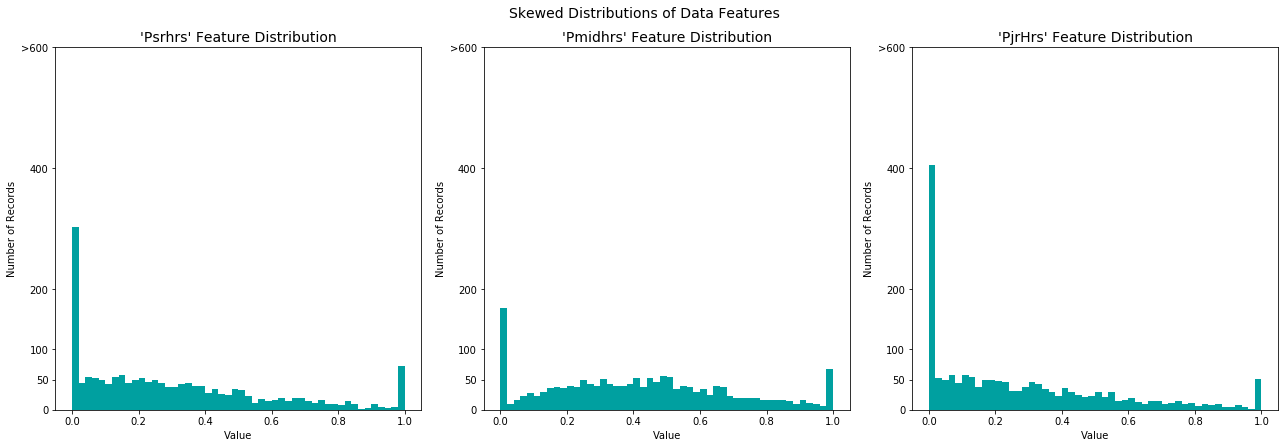

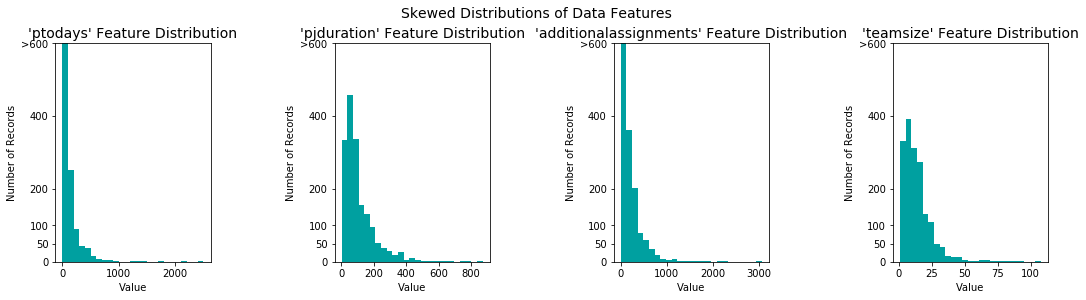

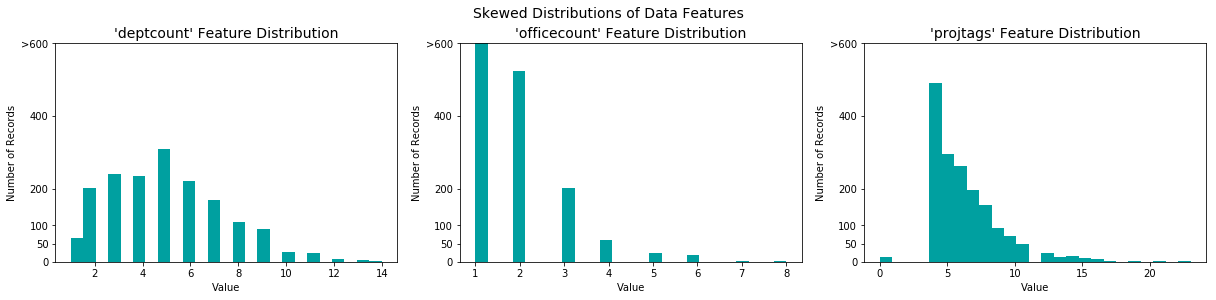

In [8]:
#distribution(data17)

#distribution2(data17)

#distribution3(data17)

#distribution(data16)

#distribution2(data16)

#distribution3(data16)

distribution(combine)

distribution2(combine)

distribution3(combine)

##### Looking at the distribution and comparing mean vs median, it can be confirmed that all the features are positively/ right skewed

#### Step 4: Transform the positively skewed distribution to normal distribution by applying natural log

In [9]:
# Log-transform the skewed features
import math
import numpy as np
skewed = ['Psrhrs','Pmidhrs','PjrHrs']
skewed1 = ['projtags','officecount']
skewed2 =['deptcount']
skewed3 = ['ptodays','pjduration','additionalassignments','teamsize']


#features_raw17[skewed] = data17[skewed].apply(lambda x: np.log(x + 1))
#features_raw17[skewed1] = data17[skewed1].apply(lambda x: np.sqrt(x))
#features_raw17[skewed1] = data17[skewed1].apply(lambda x: (x**2))
#features_raw17[skewed1] = data17[skewed1].apply(lambda x: (x**3))
#features_raw17[skewed1] = data17[skewed1].apply(lambda x: np.exp(x))
#features_raw17[skewed1] = data17[skewed1].apply(lambda x: 1/x)

# Log-transform the skewed features
#features_raw16[skewed] = data16[skewed].apply(lambda x: np.log(x + 1))
#features_raw16[skewed1] = data16[skewed1].apply(lambda x: np.sqrt(x ))
#features_raw16[skewed1] = data16[skewed1].apply(lambda x: (x**2))
#features_raw16[skewed1] = data16[skewed1].apply(lambda x: (x**3))
#features_raw16[skewed1] = data16[skewed1].apply(lambda x: np.exp(x))
#features_raw16[skewed1] = data16[skewed1].apply(lambda x: 1/x)

# Log-transform the skewed features

#features_raw1617[skewed] = combine[skewed].apply(lambda x: np.sqrt(x))
features_raw1617[skewed] = combine[skewed].apply(lambda x: np.log(x+1))
#features_raw1617[skewed] = combine[skewed].apply(lambda x: (x**2))
#features_raw1617[skewed] = combine[skewed].apply(lambda x: (x**3))
#features_raw1617[skewed] = combine[skewed].apply(lambda x: np.exp(x))
#features_raw1617[skewed] = combine[skewed].apply(lambda x: 1/x)
#features_raw1617[skewed] = features_raw1617[skewed].apply(lambda x:  np.exp(x))

#features_raw1617[skewed1] = combine[skewed1].apply(lambda x: (x**2))
#features_raw1617[skewed1] = combine[skewed1].apply(lambda x: (x**3))
#features_raw1617[skewed1] = combine[skewed1].apply(lambda x: np.sqrt(x))
#features_raw1617[skewed1] = combine[skewed1].apply(lambda x: np.exp(x))
#features_raw1617[skewed1] = combine[skewed1].apply(lambda x: 1/x)
features_raw1617[skewed1] = combine[skewed1].apply(lambda x: np.log(x+1))

features_raw1617[skewed2] = combine[skewed2].apply(lambda x: np.sqrt(x))

features_raw1617[skewed3] = combine[skewed3].apply(lambda x: np.log(x + 1))



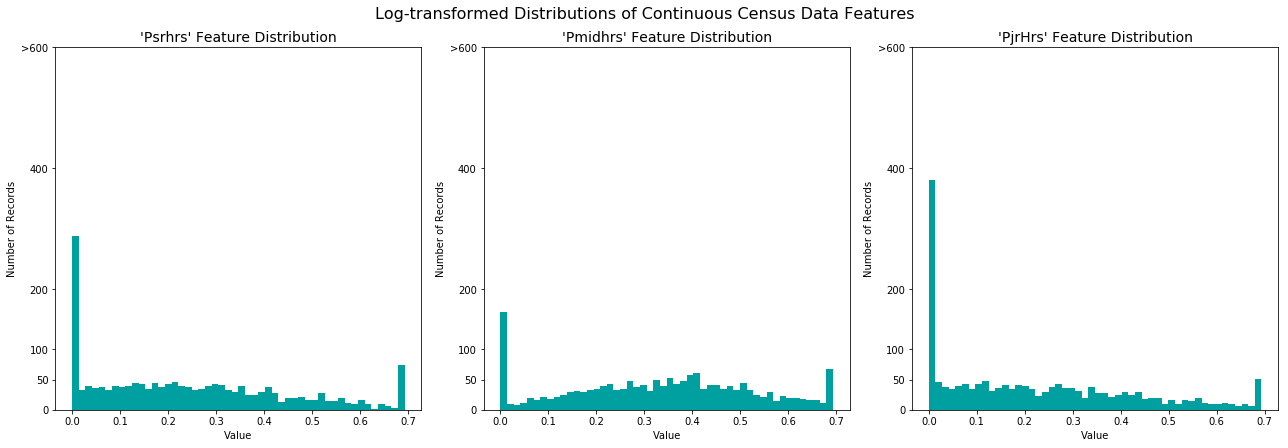

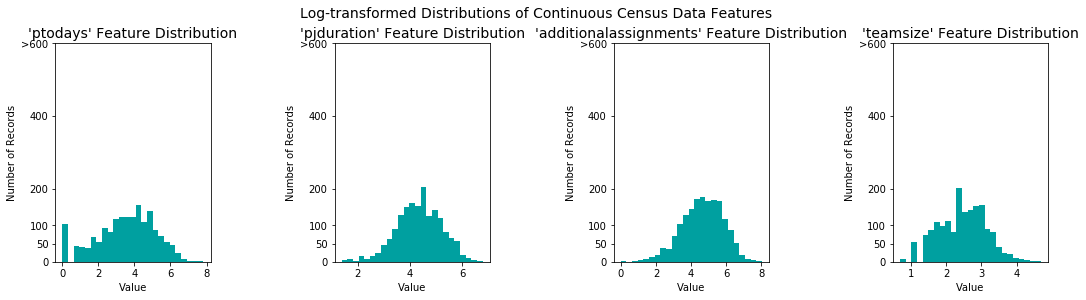

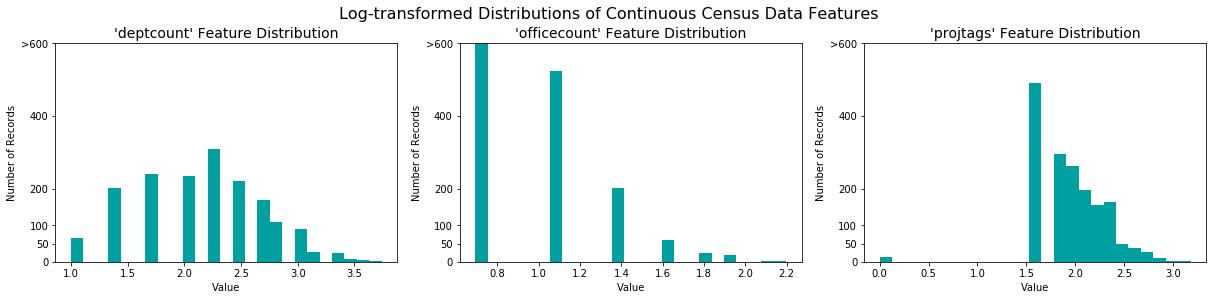

In [10]:
# Visualize the new log distributions
#distribution(features_raw17, transformed = True)

# Visualize the new log distributions
#distribution2(features_raw17, transformed = True)

# Visualize the new log distributions
#distribution3(features_raw17, transformed = True)

# Visualize the new log distributions
#distribution(features_raw16, transformed = True)

# Visualize the new log distributions
#distribution2(features_raw16, transformed = True)

# Visualize the new log distributions
#distribution3(features_raw16, transformed = True)

# Visualize the new log distributions
distribution(features_raw1617, transformed = True)

# Visualize the new log distributions
distribution2(features_raw1617, transformed = True)

# Visualize the new log distributions
distribution3(features_raw1617, transformed = True)


#### Step 5: Is to scale the features so that learners will treat all the features euqally. 


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Psrhrs','Pmidhrs','PjrHrs','ptodays','pjduration','additionalassignments','teamsize','deptcount','officecount','projtags']
#features_raw17[numerical] = scaler.fit_transform(features_raw17[numerical])
#features_raw16[numerical] = scaler.fit_transform(features_raw16[numerical])
features_raw1617[numerical] = scaler.fit_transform(features_raw1617[numerical])

# Show an example of a record with scaling applied
display(features_raw1617.head(n = 10))





,JobCode,deptcount,Psrhrs,Pmidhrs,PjrHrs,officecount,ptodays,pjduration,additionalassignments,teamsize,projtags
0,C6355,0.364743,0.053939,0.758445,0.345099,0.000000,0.639958,0.770028,0.778668,0.486696,0.724527
1,C6441,0.450847,0.698797,0.444736,0.022594,0.269577,0.642487,0.736322,0.642035,0.520094,0.000000
2,10803922,0.267010,0.083529,0.917096,0.073249,0.460845,0.677338,0.822709,0.777459,0.426379,0.506422
3,10805002,0.364743,0.240073,0.365604,0.614028,0.000000,0.589443,0.865024,0.701578,0.376189,0.563791
4,10803810,0.729486,0.695099,0.240281,0.262772,0.269577,0.777693,0.784155,0.784311,0.599744,0.000000
5,M5285,0.364743,0.839012,0.110636,0.178199,0.269577,0.659646,0.708869,0.727307,0.563076,0.563791
6,C6568,0.364743,0.077076,0.097775,0.906891,0.000000,0.574715,0.687254,0.717093,0.448141,0.724527
7,10804680,0.450847,0.452512,0.617143,0.134542,0.000000,0.671487,0.790835,0.664389,0.520094,0.724527
8,C6652,0.528691,0.052558,0.657858,0.470052,0.000000,0.720584,0.765572,0.751347,0.575905,0.691374
9,10804660,0.528691,0.269395,0.729832,0.184282,0.269577,0.699987,0.743231,0.696566,0.563076,0.807082


#### Step 6: Scaling the feature did not change its distribution

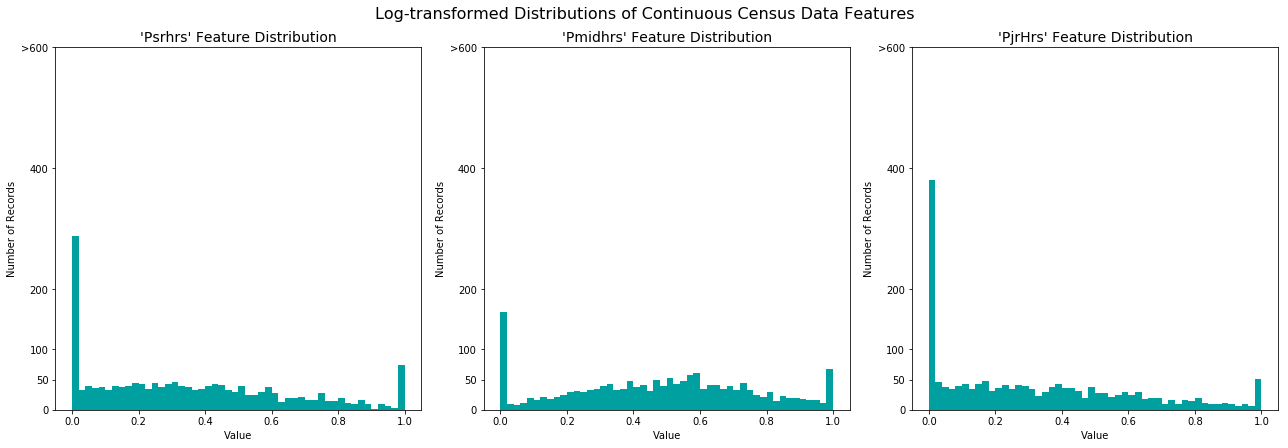

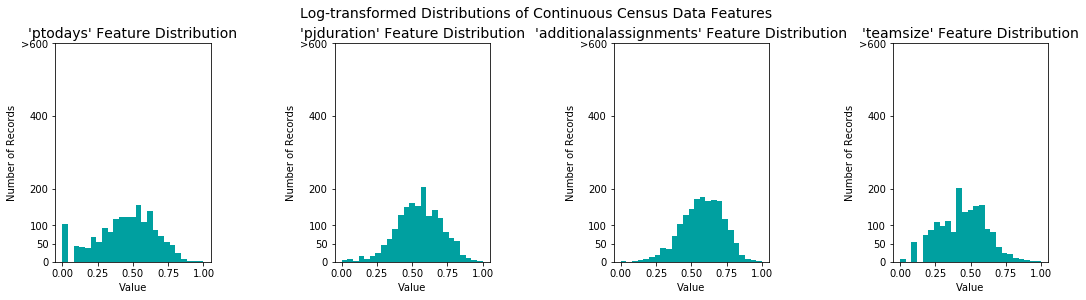

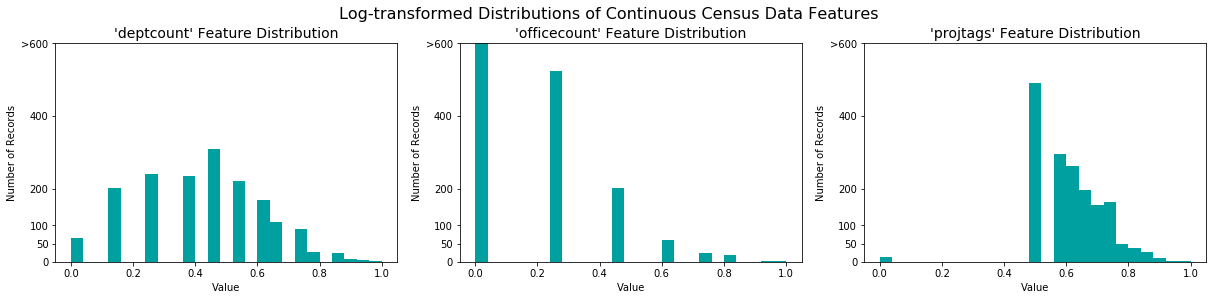

In [12]:

# Visualize the new log distributions
distribution(features_raw1617, transformed = True)

# Visualize the new log distributions
distribution2(features_raw1617, transformed = True)

# Visualize the new log distributions
distribution3(features_raw1617, transformed = True)

#### Step 7 - Split the data into Training and Test set

In [13]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw1617, overbudget1617, test_size = 0.2, random_state = 100)

# Show the results of the split
print ("Training set has {} samples",format(X_train.shape[0]))
print ("Testing set has {} samples", format(X_test.shape[0]))

('Training set has {} samples', '1367')
('Testing set has {} samples', '342')


In [14]:
X_train = X_train.drop(['JobCode'], axis = 1)
X_test = X_test.drop(['JobCode'],axis=1)

### Evaluation model performance

For this project using Accuracy as a metric to evaluate a model performance makes the most
sense. Also using F-beta scor e that considers precision and recall will be another metric to
evaluate model performance.

Accuracy = Total number of project correctly predicted  over budget or not over budget / Total number of
project

F-beta score = 1+B^2 * precision * recall / (B^2*precision) + recall

Precision = true positives/ (true positives + false positives)

Recall = true positives/ (true positives+false negatives)

B = .5, when Beta is .5 more emphasis is placed on precision

In [15]:
import math
# TODO: Calculate accuracy
fp = 0
tp = overbdg + (n_records - overbdg)
tn = 0
fn = 0
accuracy = tp  / float(n_records)
precision = tp / float((tp + fp))
recall = tp / (tp + fn)


# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = 1.25*((precision*recall)/((math.pow(.5,2)*precision)+recall))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

#F-beta score is used in the event  80% of data is sucess and 20% data is failure, then model can randmoly pick any variable as sucess, f-score helps evaluate the model performance in such situation



Naive Predictor: [Accuracy score: 1.0000, F-score: 1.0000]


In [16]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
   
    results['acc_train'] = accuracy_score(predictions_train,y_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(predictions_test,y_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=.5)
       
    # Success
    print ("%s trained on %s samples." % (format(learner.__class__.__name__), sample_size))
        
    # Return the results
    return results

In [17]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (19,7))

    # Constants
    bar_width = 0.15
    colors = ['#A00000','#00A0A0','#00A000','#8C668C','#66888c','#A1C7A1','#a02a00','#e0ad6b','#b78749','#d68620','#d6c020','#84781d'
              ,'#897b10','#f24848']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(1):
                
                # Creative plot code
                ax[int(j/3), int(j%3)].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                #when doing tuning uncomment the below
                #ax[int(j/3), int(j%3)].bar(i+k*bar_width, results[learner][metric], width = bar_width)
                ax[int(j/3), int(j%3)].set_xticks([2.45])
                ax[int(j/3), int(j%3)].set_xticklabels(["100%"])
                #ax[int(j/1), int(j%1)].set_xticks([0.45, 1.45, 2.45])
                #ax[int(j/1), int(j%1)].set_xticklabels(["1%", "10%", "100%"])
                ax[int(j/3), int(j%3)].set_xlabel("Training Set Size")
                ax[int(j/3), int(j%3)].set_xlim((-0.1, 3.0))
                

    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()
    
    #Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
        #when tunning then uncomment the below
        #patches.append(mpatches.Patch(label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.1, -.1),
              loc = 'lower left', ncol = 1,fontsize = 'x-large')
    

AdaBoostClassifier trained on 1367 samples.


C:\Users\varunn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 1367 samples.
GradientBoostingClassifier trained on 1367 samples.
MultinomialNB trained on 1367 samples.
LogisticRegression trained on 1367 samples.
DecisionTreeClassifier trained on 1367 samples.
KNeighborsClassifier trained on 1367 samples.
GaussianNB trained on 1367 samples.
SGDClassifier trained on 1367 samples.
BernoulliNB trained on 1367 samples.


C:\Users\varunn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varunn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


RandomForestClassifier trained on 1367 samples.
ExtraTreesClassifier trained on 1367 samples.
VotingClassifier trained on 1367 samples.


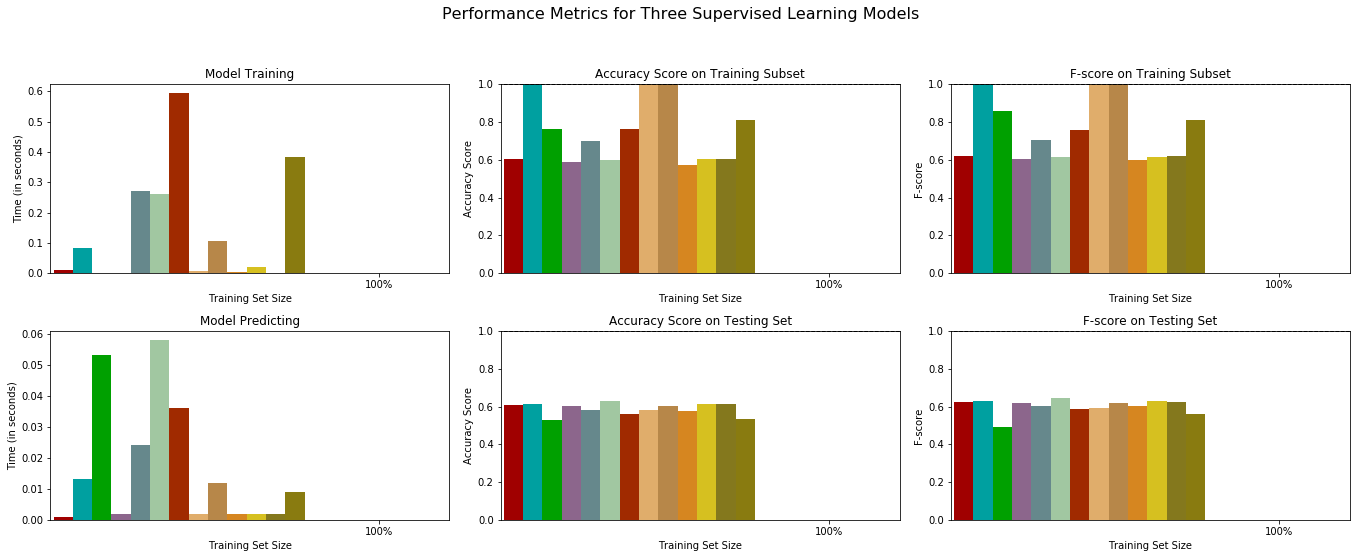

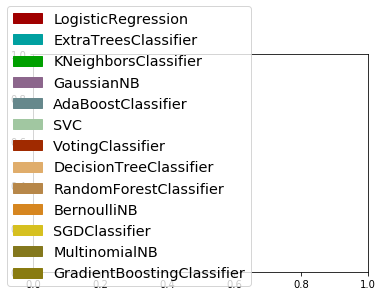

In [21]:
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


# TODO: Initialize the three models
clf_A = ABC(n_estimators=100,random_state = 42)
clf_B = svm.SVC(kernel='rbf',probability=True,random_state = 42)
clf_C =  GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=42)
clf_D = MultinomialNB(alpha=.030)
clf_E =  LogisticRegression(random_state=42)
#clf_F = tree.DecisionTreeClassifier(random_state = 42,max_depth=5,min_samples_split=.6,min_samples_leaf=.2,max_features=6)
clf_F = tree.DecisionTreeClassifier(random_state = 42)
clf_G = KNeighborsClassifier(n_neighbors=2)
clf_H = GaussianNB()
clf_I = SGDClassifier(loss='log',penalty='l2',random_state=42,n_iter=100)
clf_J = BernoulliNB(alpha=1)
clf_K = RandomForestClassifier(n_estimators=32)
#clf_K = RandomForestClassifier(n_estimators=32,max_depth=5,max_features=6)
#clf_L = ExtraTreesClassifier(n_estimators=32, max_depth=5, random_state=42)
clf_L = ExtraTreesClassifier(n_estimators=32, random_state=42)
eclf =  VotingClassifier(estimators=[('lr', clf_E), ('abc', clf_A), ('mnb', clf_D),('gbc',clf_C)], voting='soft')


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
#samples_1 = int(len(X_train)*0.01)
#samples_10 = int(len(X_train)*0.1)
samples_100 = int(len(X_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D,clf_E,clf_F,clf_G,clf_H,clf_I,clf_J,clf_K,clf_L,eclf]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
    #for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

evaluate(results, accuracy, fscore)

In [21]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
range(len(n_estimators))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.


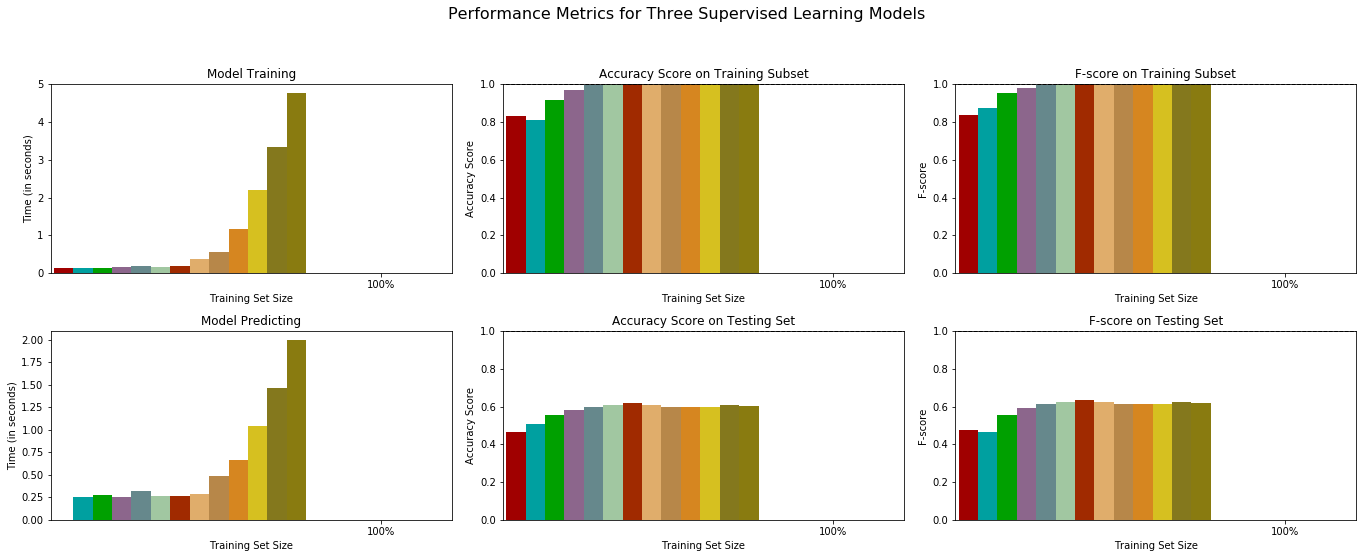

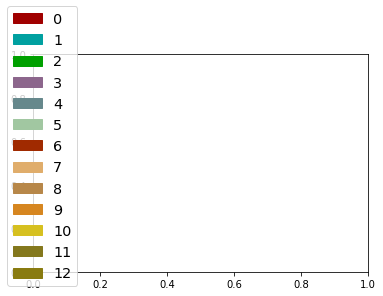

In [30]:
#Randomeforest classifier tunning 
#Estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,500,1000,1500,2000]


results = {}
for i in range(len(n_estimators)):
    estimator = n_estimators[i]
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    results[i] = train_predict(rf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

evaluate(results, accuracy, fscore)
    


RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.


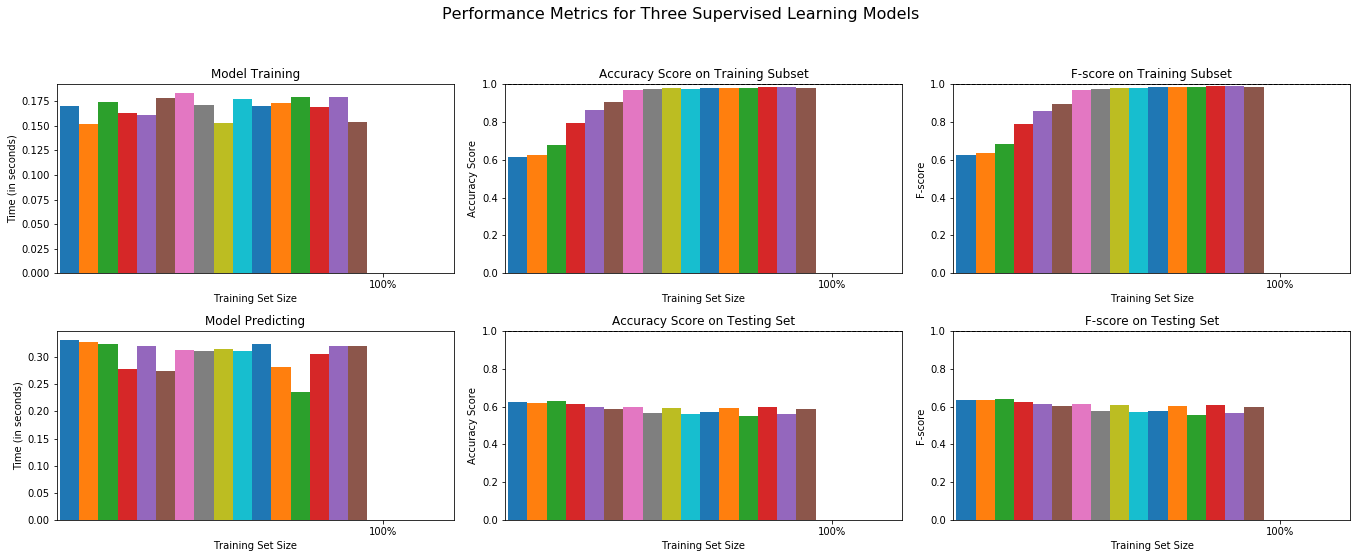

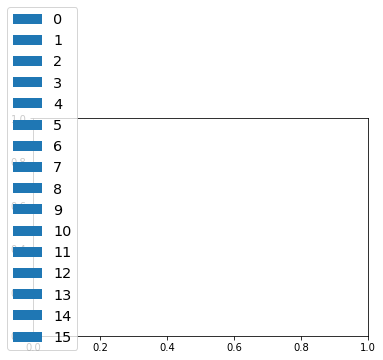

In [44]:
#The n_estimator can stop at 32 trees adding more decreases the Test accuracy and F-score
#Max depth- the deeper the trees the more split it has and the more information it captures about the data
max_depths = np.linspace(1,32, 16, endpoint=True)
results = {}
for i in range(len(max_depths)):
    max_depth = max_depths[i]
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    results[i] = train_predict(rf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

evaluate(results, accuracy, fscore)



RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.


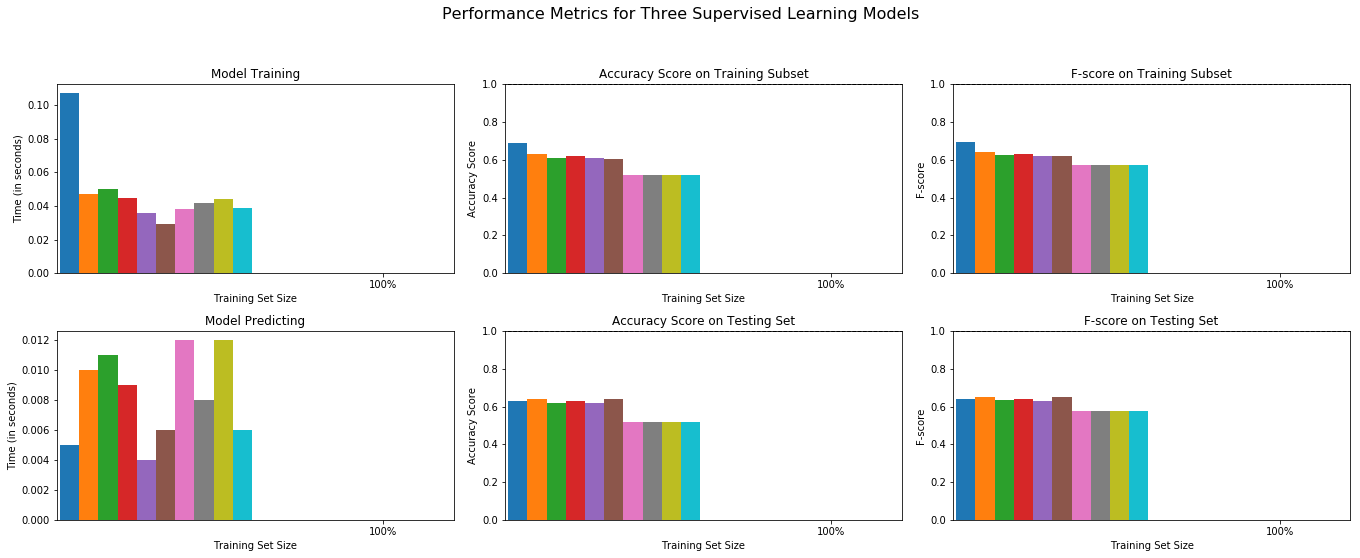

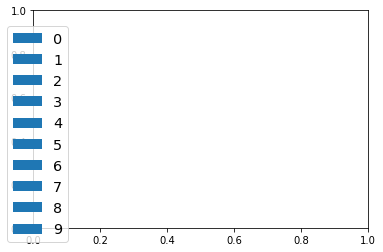

In [59]:
#The max depth as it increase reduces  the Test accuracy and F-score
#min_sample_split - minimum number of samples required to split an internal node i.e considering few samples at each node or all samples at each node.
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
results = {}
for i in range(len(min_samples_splits)):
    min_samples = min_samples_splits[i]
    rf = RandomForestClassifier(min_samples_split=min_samples)
    results[i] = train_predict(rf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

evaluate(results, accuracy, fscore)


RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.


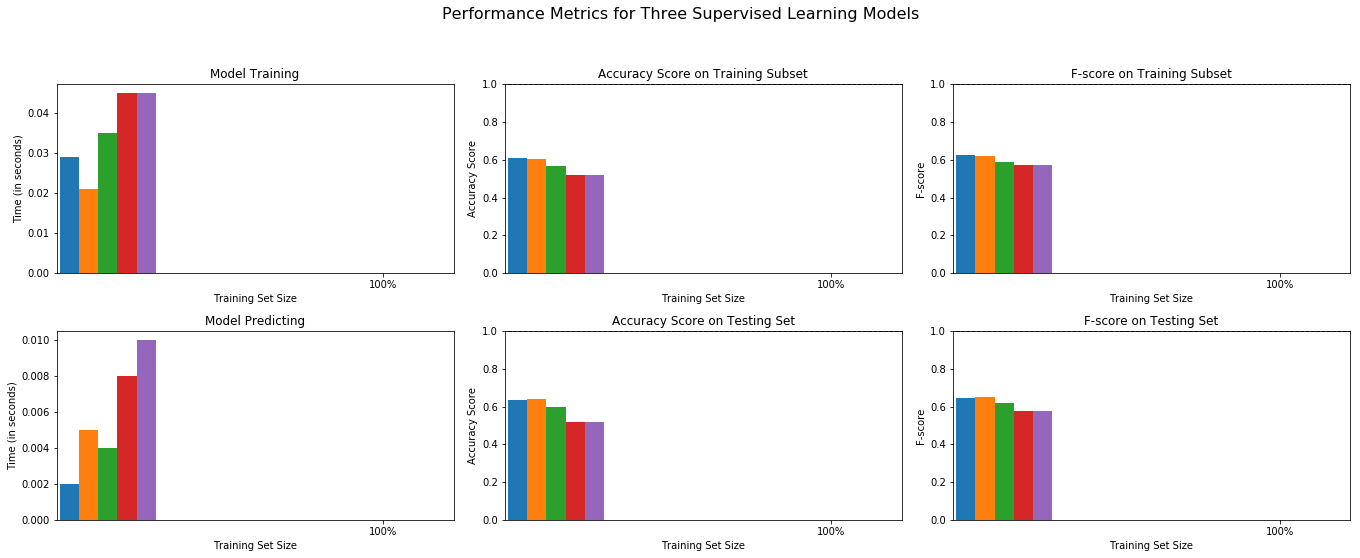

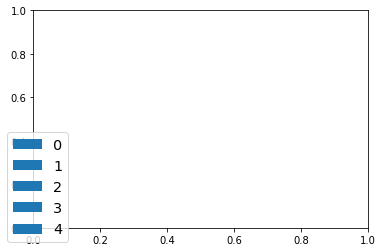

In [58]:
#We can see that when we require all of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.
#Min_samples_leaf - the minimum number of samples required in a leaf node
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
results = {}
for i in range(len(min_samples_leafs)):
    min_samples = min_samples_leafs[i]
    rf = RandomForestClassifier(min_samples_leaf=min_samples)
    results[i] = train_predict(rf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

evaluate(results, accuracy, fscore)

RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.


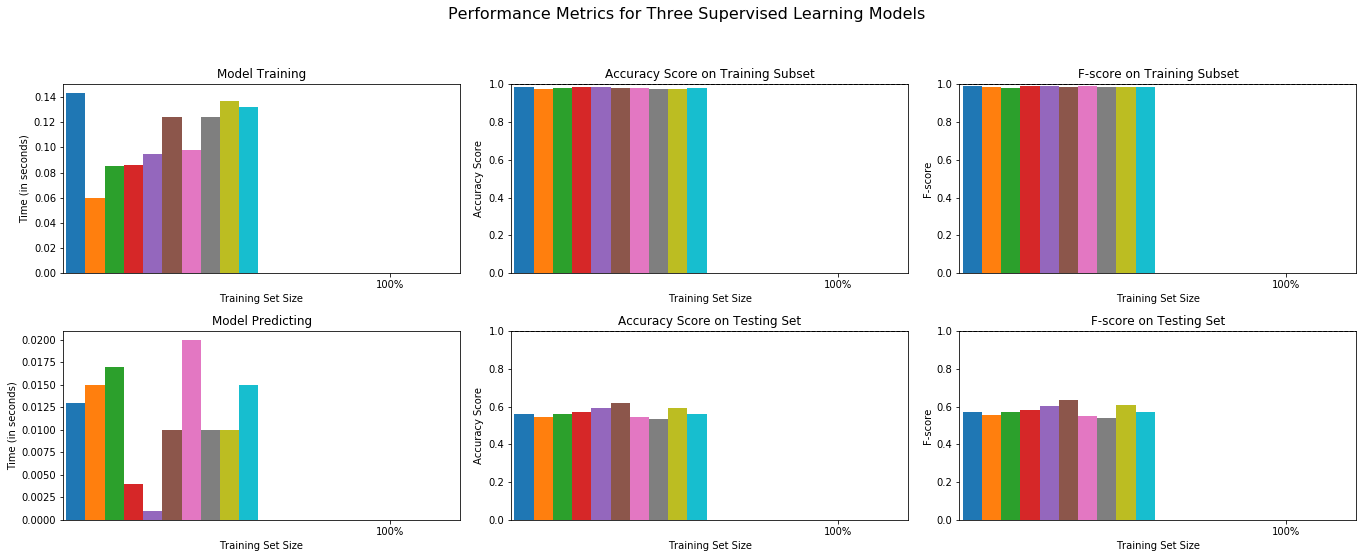

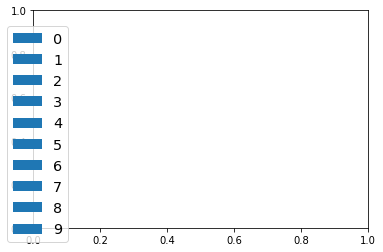

In [57]:
#same results as the max_split_samples, increase in this parameter leads to underfitting
#Max_features - number of features to be considered when considering best split
max_features = list(range(1,features_raw1617.shape[1]))

results = {}
for i in range(len(max_features)):
    max_feature = max_features[i]
    rf = RandomForestClassifier(max_features=max_feature)
    results[i] = train_predict(rf, samples, X_train, y_train, X_test, y_test)
    
# Run metrics visualization for the three supervised learning models chosen

evaluate(results, accuracy, fscore)



AdaBoostClassifier trained on 1367 samples.
SVC trained on 1367 samples.
GradientBoostingClassifier trained on 1367 samples.
MultinomialNB trained on 1367 samples.
LogisticRegression trained on 1367 samples.
DecisionTreeClassifier trained on 1367 samples.
KNeighborsClassifier trained on 1367 samples.
GaussianNB trained on 1367 samples.
SGDClassifier trained on 1367 samples.
BernoulliNB trained on 1367 samples.
RandomForestClassifier trained on 1367 samples.


C:\Users\varunn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


ExtraTreesClassifier trained on 1367 samples.
VotingClassifier trained on 1367 samples.


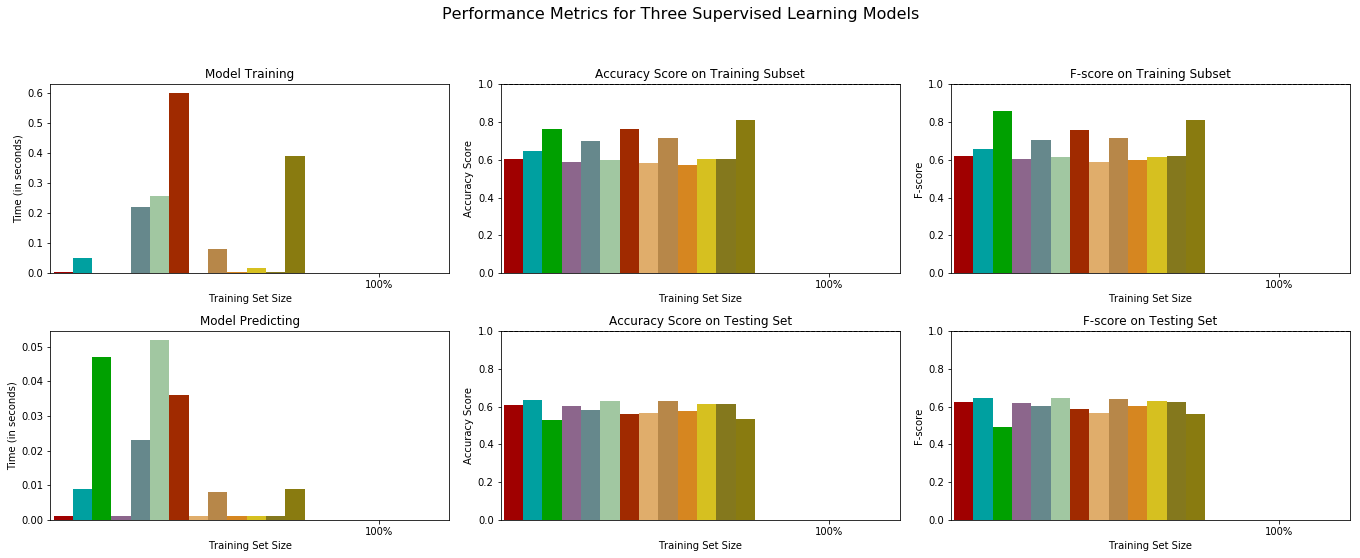

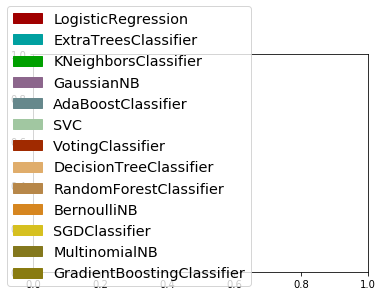

In [23]:
# TODO: Initialize the three models

clf_C =  GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=42)
clf_F = tree.DecisionTreeClassifier(random_state = 42,max_depth=5,min_samples_split=.6,min_samples_leaf=.2,max_features=6)
#clf_F = tree.DecisionTreeClassifier(random_state = 42)
clf_G = KNeighborsClassifier(n_neighbors=2)
clf_H = GaussianNB()
clf_I = SGDClassifier(loss='log',penalty='l2',random_state=42,n_iter=100)
clf_J = BernoulliNB(alpha=1)
#clf_K = RandomForestClassifier(n_estimators=32)
clf_K = RandomForestClassifier(n_estimators=32,max_depth=5,max_features=6)
clf_L = ExtraTreesClassifier(n_estimators=32, max_depth=5, random_state=42)
#clf_L = ExtraTreesClassifier(n_estimators=32, random_state=42)
#eclf =  VotingClassifier(estimators=[('lr', clf_E), ('abc', clf_A), ('mnb', clf_D),('gbc',clf_C)], voting='soft')


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
#samples_1 = int(len(X_train)*0.01)
#samples_10 = int(len(X_train)*0.1)
samples_100 = int(len(X_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D,clf_E,clf_F,clf_G,clf_H,clf_I,clf_J,clf_K,clf_L,eclf]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
    #for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

evaluate(results, accuracy, fscore)

### Feature selection

In [26]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

In [59]:
#Recursive Feature Elimination
#The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

# Feature Extraction with RFE
from sklearn.feature_selection import RFE

rfe = RFE(clf_E, 5)
rfefit = rfe.fit(X_train, y_train)
print("Num Features:", rfefit.n_features_)
print("Selected Features:", rfefit.support_)
print("Feature Ranking:", rfefit.ranking_)


('Num Features:', 5)
('Selected Features:', array([False,  True, False, False,  True,  True,  True,  True, False,
       False]))
('Feature Ranking:', array([5, 1, 6, 4, 1, 1, 1, 1, 3, 2]))


Based on the ranking feature importance is 
 - SrHrs
 - Teamsize
 - Additionalassignments
 - Pjduration
 - Ptodays

Based on the ranking feature importance is 
 - SrHrs
 - Officecount
 - Teamsize
 - Additionalassignments
 - Pjduration


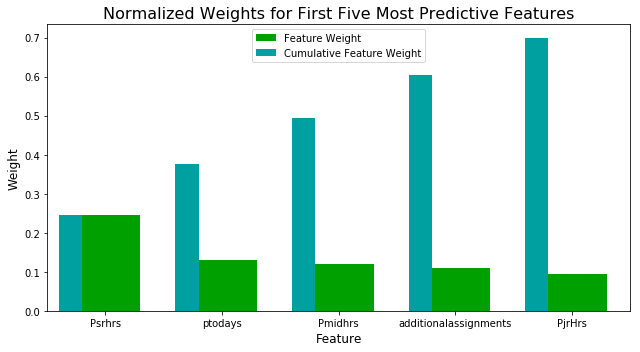

In [29]:
#feature importance

#importances = clf_A.feature_importances_
importances = clf_K.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

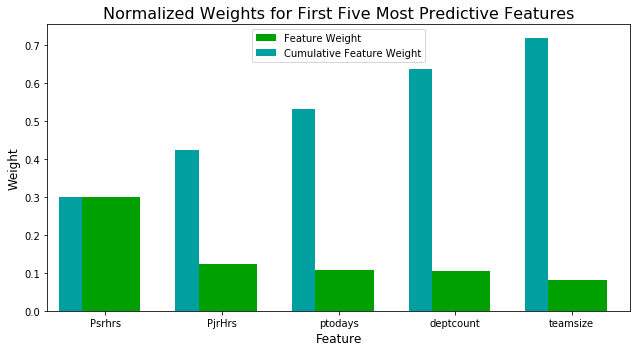

In [30]:
importances = clf_L.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

In [ ]:
#Univariate Selection
#Below is the chi squared (chi^2) statistical test  to select 5 of the best features from the dataset

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data

kbest = SelectKBest(score_func=chi2, k=5)
kfit = kbest.fit(X_train, y_train)
# summarize scores
np.set_printoptions(precision=3)
print(kfit.scores_)
#features = fit.transform(X)
# summarize selected features
#print(features[0:5,:])



importances = kfit.scores_
# Plot
feature_plot(importances, X_train, y_train)

In [62]:
 

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf_reduced = clf_A.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf_A.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print ("Accuracy on testing data:",format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data:",format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

('Accuracy on testing data:', '0.584795321637')
('F-score on testing data:', '0.60327198364')


In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
#C_range = np.logspace(-2, 10, 13)
#gamma_range = np.logspace(-9, 3, 13)
C_range = np.logspace(-2,10,5)
gamma_range = np.logspace(-9,3,5)
param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid = GridSearchCV(SVC(random_state=42), param_grid=param_grid)

grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


C:\Users\varunn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The best parameters are {'C': 10000000000.0, 'gamma': 1e-09} with a score of 0.59


In [64]:
from sklearn.metrics import accuracy_score
predictions_test = grid.predict(X_test)
results = accuracy_score(predictions_test,y_test)
print("accuracy score %0.2f" % (results))


accuracy score 0.60


In [ ]:
#Neural network

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU, PReLU

model = Sequential()

model.add(Dense(2000,input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))

### TODO: Define your architecture.

model.summary()


model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint  
import h5py

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 500

### Do NOT modify the code below this line.

 

    
   
    
    # TODO: Calculate the training time
   

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',verbose=1, save_best_only=True)
start = time() # Get start time
model.fit(X_train, y_train, 
          epochs=epochs, batch_size=400, validation_split=0.2,callbacks=[checkpointer], verbose=1,shuffle=True)
end = time() # Get end time

model.load_weights('mnist.model.best.hdf5')

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
#f-score = (fbeta_score(y_test, reduced_predictions, beta = 0.5)))
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print ('Run time',end-start)

In [ ]:
for key,learner in enumerate (results.keys()):
            print (learner,'accuracy:',results[learner][0]['acc_test'],'f-score:',results[learner][0]['f_test'])
        

In [ ]:
for key,learner in enumerate (results.keys()):
            print (learner,'accuracy:',results[learner][0]['acc_test'],'f-score:',results[learner][0]['f_test'])